In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Visualisation libraries

## Text
from colorama import Fore, Back, Style
from IPython.display import display, Markdown, Latex

## matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Linear Model Selection and Regularization

Recall the linear regression model: $$Y= \beta_0 + \sum_{j=1}^{p}\beta_{j} X_{j},$$ where $X_j$ represents the j-th predictor and $\beta_j$ quantifies the association between that variable and the response.

The linear regression model is commonly used to describe the relationship between a response Y and a set of variables $X_j,~1\leq j\leq p$. 

**Prediction Accuracy**: Provided that the true relationship between the response and the predictors is approximately linear, the least-squares estimates will have low bias.
Let n denotes the number of observations and $p$ denotes the number of variables.

* If $n \gg  p$  ($n$ is much larger than $p$), least squares estimates tend to also have low variance and, thus, can perform well on test observations.

* If $n$ is **not** much larger than $p$, then there can be a lot of variability in the least-squares fit, resulting in **overfitting** and consequently poor predictions on future observations not used in model training.

* If $n<p$, then there is no longer a unique least squares coefficient estimate: the variance is infinite so the **method cannot be used at all**. 

The variance at the cost of a negligible increase in bias can be reduced significantly by **constraining** or **shrinking** the estimated coefficients.

**Model Interpretability**: In many multiple regression models, several variables are not associated with the response. The resulting model can become more complex if such irrelevant variables are included.
Including leads to. Nonetheless, removing these variables can lead to a model that is more easily interpreted. This task can be done by simply setting the corresponding coefficient estimates
to zero! On the other hand, least-squares is extremely unlikely to yield any coefficient estimates that are exactly zero.

## Variable Selection
There are three important classes of methods that can be used for **variable selection**

* **Subset Selection**: a subset of the $p$ predictors is used for fitting a model using least squares.

* **Shrinkage (regularization)**: A model is fitted using all $p$ predictors. However, the estimated coefficients are shrunken towards zero relative to the least-squares estimates.

* **Dimension Reduction**. the $p$ predictors are projected into a M-dimensional subspace where $M < p$. Then these $M$ projections are used as predictors to fit a linear regression model by least squares.

* <font color='Blue'>**Subset Selection**</font>:
    * **Best Subset Selection**: All $\left(\begin{array}{c}p\\k \end{array}\right)$ models that contain exactly k predictors are fitted, and then a single best model is choosen.
    * **Stepwise Selection**:
        * <font color='Green'>**Forward Stepwise Selection**</font>: It begins with a model containing no predictors and then predictors are added to the model iteratively until all of the predictors are in the model. The variable that gives the greatest additional
improvement to the fit is added to the model at each step.
        * <font color='Green'>**Backward Stepwise Selection**</font>: Unlike forward stepwise selection, here the process begins  with the full least squares model containing all $p$ predictors, and then the least useful predictors are removed iteratively,
        * <font color='Green'>**Hybrid Approaches**</font>: Variables are added to the model sequentially; however, after adding each new variable, the method may also remove any variables that no longer provide an improvement in the model fit.

## The Test Error
Selecting the best model for the test error:

* The test error can be **indirectly** estimated by adjusting the training error to account for the bias due to overfitting.
* The test error can be **directly** estimated using either a validation set approach or a *cross-validation* approach.

### Indirect Estimatoins
Let $\hat{\sigma}^2$ be an estimate of the variance of the error terms. Then
\begin{align}
C_p &= \frac{1}{n} (RSS + 2d\hat{\sigma}^2 ),\\
AIC &= \frac{1}{n\hat{\sigma}^2}(RSS + 2d\hat{\sigma}^2),\\
AIC &= \frac{1}{n\hat{\sigma}^2}(RSS + \log(n)d\hat{\sigma}^2),\\
\text{Adjusted }R^2 &= 1 -\frac{RSS/(n − d − 1)}{TSS/(n − 1)}. 
\end{align}

### Direct Estimatoins
Cross-validation used to be computationally prohibitive for many large problems; however, with recent advantages in computing, performing cross-validation is no longer an issue. Thus, cross-validation is a very attractive approach for selecting from among a number of models under consideration.

## Shrinkage Methods

### Ridge Regression
The main difference between least squares and this method is that the coefficients are estimated by minimizing a slightly different quantity.

The ridge regression coefficient estimates $\hat{\beta}^R$ are the values that minimize

$$\underbrace{\sum_{i=1}^{n}\left(y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2}_{RSS}
+ \lambda \sum_{j=1}^{p} \beta_j^2=RSS+ \lambda \sum_{j=1}^{p} \beta_j^2$$
where $\lambda \geq$ 0 is a *tuning parameter*. 

### Lasso Regression
The lasso coefficients, $\hat{\beta}^L_\lambda$, minimize the quantity

$$\underbrace{\sum_{i=1}^{n}\left(y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2}_{RSS}
+ \lambda\sum_{j=1}^{p} |\beta_j^2|=RSS+\lambda\sum_{j=1}^{p} |\beta_j^2|$$

<div class="alert alert-block alert-info">
<font size="+2"><b>Hitters Dataset Example</b></font>
</div>

The Hitters data is part of the the [**ISLR package**](https://cran.r-project.org/web/packages/ISLR/index.html). This dataset can be extracted from the [**ISLR package**](https://cran.r-project.org/web/packages/ISLR/index.html) using the following syntax.


```R
library (ISLR)
write.csv(Hitters, "Hitters.csv")
```

In [2]:
Hitters = pd.read_csv('Data/Hitters.csv', index_col=0)
Hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


Note that, categorical features:

In [3]:
Hitters.select_dtypes(include='object').head()

,League,Division,NewLeague
-Andy Allanson,A,E,A
-Alan Ashby,N,W,N
-Alvin Davis,A,W,A
-Andre Dawson,N,E,N
-Andres Galarraga,N,E,N


Therefore, the following columns are object columns that can be converted to dummy variables.

In [4]:
Columns = Hitters.select_dtypes(include='object').columns.tolist()
print(Back.CYAN + Fore.BLACK + Style.BRIGHT + 'Object Columns' + Style.RESET_ALL + '= %s' % ', '.join(Columns))
Temp = pd.get_dummies(Hitters[['League', 'Division', 'NewLeague']])
Temp.head()

Object Columns= League, Division, NewLeague


,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
-Andy Allanson,1,0,1,0,1,0
-Alan Ashby,0,1,0,1,0,1
-Alvin Davis,1,0,0,1,1,0
-Andre Dawson,0,1,1,0,0,1
-Andres Galarraga,0,1,1,0,0,1


In [5]:
df = Hitters.drop(columns = Columns)
df = pd.concat([df, Temp], axis=1)
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,PutOuts,Assists,Errors,Salary,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,...,446,33,20,NaN,1,0,1,0,1,0
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,...,632,43,10,475.0,0,1,0,1,0,1
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,...,880,82,14,480.0,1,0,0,1,1,0
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,...,200,11,3,500.0,0,1,1,0,0,1
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,...,805,40,4,91.5,0,1,1,0,0,1


Nows, let's define **X** and **y** sets, and then we can split the train set and test set using **train_test_split** function.

In [6]:
df = df.dropna()
X = df.drop(['Salary'], axis=1)
# Scaling the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

pd.DataFrame(data={'Set':['X_train','X_test','y_train','y_test'],
                   'Shape':[X_train.shape, X_test.shape, y_train.shape, y_test.shape]}).set_index('Set').T

Set,X_train,X_test,y_train,y_test
Shape,"(210, 22)","(53, 22)","(210,)","(53,)"


## Ridge Regression

Ridge regression can be done in python using [**sklearn Ridge**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html). Note that in Python packages $\alpha$ has the same role as $\lambda$ from above.

In [7]:
# Let alpha = 1
reg = Ridge(alpha = 1.0)
_ = reg.fit(X_train, y_train)
# reg.score(scale(X_train), y_train)

# Creating an array for $\alpha$:
alphas = 10**np.linspace(10,-2,100)*0.5
# Using ridge
reg = Ridge()
# a set of coefficients
coefs = []

for alph in alphas:
    reg.set_params(alpha= alph )
    reg.fit(X_train, y_train)
    coefs.append(reg.coef_)
del alph

Now, we can see that, the Ridge coefficients get larger when we decrease $\lambda$.

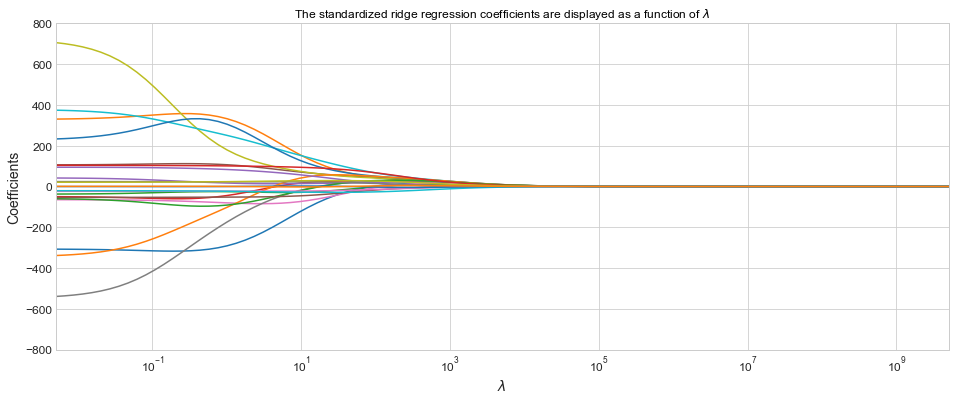

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
_ = ax.plot(alphas, coefs)
_ = ax.set_xscale('log')
_ = ax.set_xlabel(r"$\lambda$")
_ = ax.set_ylabel('Coefficients')
_ = ax.set_title('The standardized ridge regression coefficients are displayed as a function of $\lambda$')
_ = ax.set_xlim([alphas.min(), alphas.max()])
_ = ax.set_ylim([-8e2, 8e2])

### Ridge Regression with CV

RidgeCV is the Ridge regression with built-in cross-validation. See more about this function [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html)

In [9]:
reg = RidgeCV(alphas = alphas, scoring='neg_mean_squared_error')
_ = reg.fit(X_train, y_train)
# lambda
display(Latex(r'The parameter $\lambda$ = %.4f' % reg.alpha_))

<IPython.core.display.Latex object>

## The Lasso

In [10]:
reg = Lasso(alpha=0.1)
_ = reg.fit(X_train, y_train)

# Creating an array for $\alpha$:
alphas = 10**np.linspace(10,-2,100)*0.5
# Using lasso
reg = Lasso(max_iter=10000)
# a set of coefficients
coefs = []

for alph in alphas*2:
    reg.set_params(alpha= alph )
    reg.fit(X_train, y_train)
    coefs.append(reg.coef_)
del alph

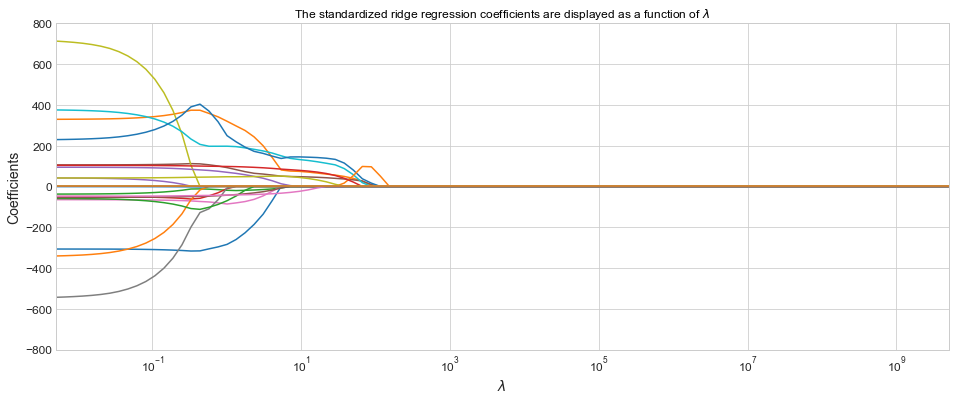

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
_ = ax.plot(alphas, coefs)
_ = ax.set_xscale('log')
_ = ax.set_xlabel(r"$\lambda$")
_ = ax.set_ylabel('Coefficients')
_ = ax.set_title('The standardized ridge regression coefficients are displayed as a function of $\lambda$')
_ = ax.set_xlim([alphas.min(), alphas.max()])
_ = ax.set_ylim([-8e2, 8e2])

### Lasso Regression with CV

LassoCV is the Lasso linear model with iterative fitting along a regularization path. See more about this function [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html)

In [12]:
reg = LassoCV(cv=5, random_state=0)
_ = reg.fit(X_train, y_train)
# lambda
display(Latex(r'The parameter $\lambda$ = %.4f' % reg.alpha_))

<IPython.core.display.Latex object>

***

## Refrences

* James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). [An introduction to statistical learning](https://link.springer.com/book/10.1007/978-1-4614-7138-7) (Vol. 112, pp. 3-7). New York: springer.

* Jordi Warmenhoven, [ISLR-python](https://github.com/JWarmenhoven/ISLR-python)
* James, G., Witten, D., Hastie, T., & Tibshirani, R. (2017). [ISLR: Data for an Introduction to Statistical Learning with Applications in R](https://cran.r-project.org/web/packages/ISLR/index.html)

***